### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [3]:
df = pd.read_csv('../../02_Daten/Validierung/4.csv', sep=',')

C:\Users\pauls\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,11,12,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Datensätze kennenlernen

was bedeutet assemblyGroup

df2 und df5 haben identische Spalten -> Status und Temperatur

bei df1 sind noch kraft und weg dabei

bei df3 zusätzlich drehmoment und winkel

um was für Datensätze handelt es sich bei Temperatur, Kraft, Weg etc.

df4 so wie wir es kennen mit vielen NaNs + live-leck

In [5]:
# Richtige Zeit für alle Einträge
df['date'] = [datetime.utcfromtimestamp(x/1000) for x in df['timestamp']]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969156 entries, 0 to 1969155
Data columns (total 22 columns):
 #   Column                              Dtype         
---  ------                              -----         
 0   timestamp                           int64         
 1   identnummer                         object        
 2   assemblyGroup                       float64       
 3   iomaster                            bool          
 4   messenaktiv                         bool          
 5   handaktiv                           bool          
 6   druck                               float64       
 7   temperatur                          float64       
 8   leck                                float64       
 9   liveleck                            float64       
 10  status                              int64         
 11  maintenance_label                   object        
 12  rework_label                        object        
 13  configuration_label                 object

In [7]:
df.isnull().sum()

timestamp                                   0
identnummer                            706609
assemblyGroup                          706609
iomaster                                    0
messenaktiv                                 0
handaktiv                                   0
druck                                       0
temperatur                                  0
leck                                        0
liveleck                                    0
status                                      0
maintenance_label                     1967053
rework_label                          1937202
configuration_label                   1968108
repair_label                          1968556
maintenance_label_cleaning                  0
rework_label_assembly_error                 0
repair_label_change_dichtring               0
configuration_label_druck_change_5          0
configuration_label_druck_change_6          0
configuration_label_druck_change_7          0
date                              

In [9]:
df.dropna(axis=1, inplace=True)

In [11]:
df.liveleck.value_counts()

 0.000000      850942
-100.000000    274137
-4.812506          23
-4.324788          23
-4.789605          23
                ...  
-88.204401          1
-92.136267          1
-96.068134          1
-12.076870          1
-23.706764          1
Name: liveleck, Length: 494001, dtype: int64

### Messwerte über Zeitraum plotten

df4

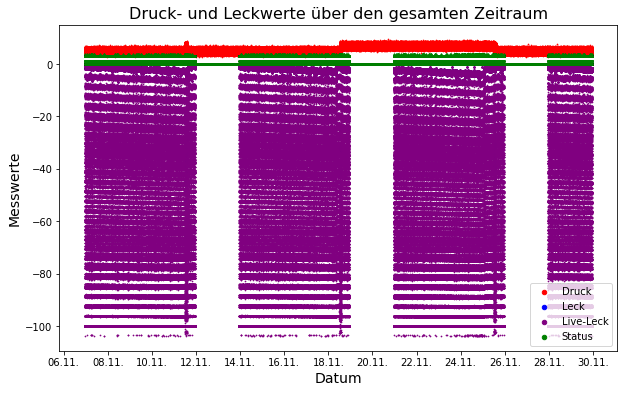

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df.date, df.druck, color='red', label='Druck', s=0.5)
ax.scatter(df.date, df.leck, color='blue', label='Leck', s=0.5)
ax.scatter(df.date, df.liveleck, color='purple', label='Live-Leck', s=0.5)
ax.scatter(df.date, df.status, color='green', label='Status', s=0.5)

date_form = DateFormatter("%d.%m.")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2)) # damit nicht direkt nach dem 31.10 der 01.11 angezeigt wird
ax.xaxis.set_major_formatter(date_form)

ax.set_title("Druck- und Leckwerte über den gesamten Zeitraum", fontsize=16)
ax.set_xlabel("Datum", fontsize=14)
ax.set_ylabel("Messwerte", fontsize=14)

lgnd = plt.legend(loc=4, numpoints=1, fontsize=10)

#change the marker size manually for lines
lgnd.legendHandles[0]._sizes = [20]
lgnd.legendHandles[1]._sizes = [20]
lgnd.legendHandles[2]._sizes = [20]
lgnd.legendHandles[3]._sizes = [20]

Prozess eines Messvorgangs genauer anschauen

In [12]:
df[df.liveleck!=0]

timestamp  iomaster  messenaktiv  handaktiv     druck  \
211      1667775812000     False         True      False  4.725240   
212      1667775813000     False         True      False  5.493854   
213      1667775814000     False         True      False  5.102452   
214      1667775815000     False         True      False  5.336762   
215      1667775816000     False         True      False  4.779593   
...                ...       ...          ...        ...       ...   
1969151  1669762796000     False         True      False  5.668804   
1969152  1669762797000     False         True      False  4.435486   
1969153  1669762798000     False         True      False  4.614135   
1969154  1669762799000     False         True      False  4.480499   
1969155  1669762800000     False         True      False  4.898234   

         temperatur  leck    liveleck  status  maintenance_label_cleaning  \
211       24.004845   0.0 -100.000000       3                       False   
212       24.004845   0.0 -100.000000       3                       False   
213       24.004845   0.0 -100.000000       3                       False   
214       24.004845   0.0 -100.000000       3                       False   
215       24.004845   0.0 -100.000000       3                       False   
...             ...   ...         ...     ...                         ...   
1969151   24.017771   0.0   -5.199465       3                       False   
1969152   24.017771   0.0   -1.553291       3                       False   
1969153   24.017771   0.0   -1.553291       3                       False   
1969154   24.017771   0.0   -1.553291       3                       False   
1969155   24.017771   0.0   -1.553291       3                       False   

         rework_label_assembly_error  repair_label_change_dichtring  \
211                            False                          False   
212                            False                          False   
213                            False                          False   
214                            False                          False   
215                            False                          False   
...                              ...                            ...   
1969151                        False                          False   
1969152                        False                          False   
1969153                        False                          False   
1969154                        False                          False   
1969155                        False                          False   

         configuration_label_druck_change_5  \
211                                   False   
212                                   False   
213                                   False   
214                                   False   
215                                   False   
...                                     ...   
1969151                               False   
1969152                               False   
1969153                               False   
1969154                               False   
1969155                               False   

         configuration_label_druck_change_6  \
211                                   False   
212                                   False   
213                                   False   
214                                   False   
215                                   False   
...                                     ...   
1969151                               False   
1969152                               False   
1969153                               False   
1969154                               False   
1969155                               False   

         configuration_label_druck_change_7                date  
211                                   False 2022-11-06 23:03:32  
212                                   False 2022-11-06 23:03:33  
213                                   False 2022-11-06 23:03:34  


In [15]:
df[250:300]

timestamp  iomaster  messenaktiv  handaktiv     druck  temperatur  \
250  1667775851000     False         True      False  4.891106   24.004845   
251  1667775852000     False         True      False  5.026464   24.004845   
252  1667775853000     False         True      False  5.476722   24.004845   
253  1667775854000     False         True      False  4.020309   24.004845   
254  1667775855000     False         True      False  4.808359   24.004845   
255  1667775856000     False         True      False  4.696572   24.004845   
256  1667775857000     False         True      False  5.070183   24.004845   
257  1667775858000     False         True      False  5.136736   24.004845   
258  1667775859000     False         True      False  4.630565   24.004845   
259  1667775860000     False         True      False  5.548979   24.004845   
260  1667775861000     False         True      False  4.772388   24.004845   
261  1667775862000     False         True      False  4.602263   24.004845   
262  1667775863000     False         True      False  5.829643   24.004845   
263  1667775864000     False         True      False  4.432238   24.004845   
264  1667775865000     False         True      False  4.521703   24.004845   
265  1667775866000     False         True      False  5.453825   24.004845   
266  1667775867000     False         True      False  5.304981   24.004845   
267  1667775868000     False         True      False  5.387576   24.004845   
268  1667775869000     False         True      False  4.167319   24.004845   
269  1667775870000     False         True      False  4.882844   24.004845   
270  1667775871000     False         True      False  5.066268   24.004845   
271  1667775872000     False         True      False  5.214779   24.004845   
272  1667775873000     False         True      False  4.645834   24.004845   
273  1667775874000     False         True      False  4.304204   24.004845   
274  1667775875000     False         True      False  4.326538   24.004845   
275  1667775876000     False        False      False  5.729084   24.004845   
276  1667775877000     False        False      False  4.752139   24.004845   
277  1667775878000     False        False      False  5.472693   24.004845   
278  1667775879000     False        False      False  3.751130   24.004845   
279  1667775880000     False        False      False  5.479281   24.004845   
280  1667775881000     False        False      False  4.264834   24.004845   
281  1667775882000     False        False      False  4.642129   24.004845   
282  1667775883000     False        False      False  5.175805   24.004845   
283  1667775884000     False        False      False  5.087838   24.004845   
284  1667775885000     False        False      False  4.448962   23.906965   
285  1667775886000     False        False      False  4.848006   23.962157   
286  1667775888000     False        False      False  5.139687   23.987483   
287  1667775889000     False        False      False  4.713069   23.987483   
288  1667775890000     False        False      False  4.547810   23.987483   
289  1667775891000     False        False      False  5.609670   23.987483   
290  1667775892000     False        False      False  5.962574   23.987483   
291  1667775893000     False         True      False  5.555222   23.987483   
292  1667775894000     False         True      False  5.131445   23.987483   
293  1667775895000     False         True      False  4.624242   23.987483   
294  1667775896000     False         True      False  5.476892   23.987483   
295  1667775897000     False         True      False  5.073202   23.987483   
296  1667775898000     False         True      False  5.474071   23.987483   
297  1667775899000     False         True      False  5.259212   23.987483   
298  1667775900000     False         True      False  4.843940   23.987483   
299  1667775901000     False         True      False  5.523793   23.987483   

         leck    liveleck  sta

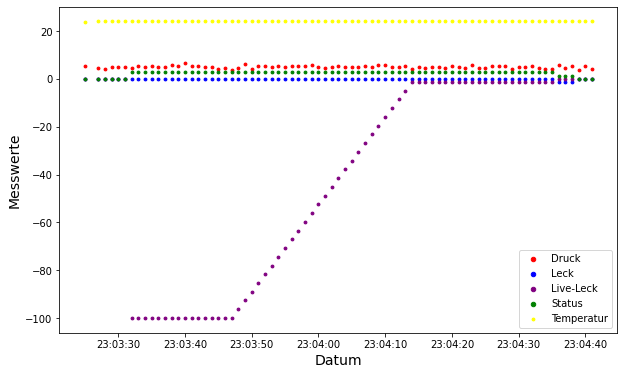

In [26]:
sample = df[205:281]
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(sample.date, sample.druck, color='red', label='Druck', s=8)
ax.scatter(sample.date, sample.leck, color='blue', label='Leck', s=8)
ax.scatter(sample.date, sample.liveleck, color='purple', label='Live-Leck', s=8)
ax.scatter(sample.date, sample.status, color='green', label='Status', s=8)
ax.scatter(sample.date, sample.temperatur, color='yellow', label='Temperatur', s=8)

ax.set_xlabel("Datum", fontsize=14)
ax.set_ylabel("Messwerte", fontsize=14)

lgnd = plt.legend(loc=4, numpoints=1, fontsize=10)

#change the marker size manually for lines
lgnd.legendHandles[0]._sizes = [20]
lgnd.legendHandles[1]._sizes = [20]
lgnd.legendHandles[2]._sizes = [20]
lgnd.legendHandles[3]._sizes = [20]

In [36]:
df.head()

timestamp  iomaster  messenaktiv  handaktiv     druck  temperatur  \
0  1667775600000     False        False      False  5.419293   23.925303   
1  1667775601000     False        False      False  4.437359   24.078188   
2  1667775602000     False        False      False  4.854461   23.977208   
3  1667775603000     False        False      False  5.028491   23.983130   
4  1667775604000     False        False      False  4.439437   23.937964   

   leck  liveleck  status  maintenance_label_cleaning  \
0   0.0       0.0       0                       False   
1   0.0       0.0       0                       False   
2   0.0       0.0       0                       False   
3   0.0       0.0       0                       False   
4   0.0       0.0       0                       False   

   rework_label_assembly_error  repair_label_change_dichtring  \
0                        False                          False   
1                        False                          False   
2                        False                          False   
3                        False                          False   
4                        False                          False   

   configuration_label_druck_change_5  configuration_label_druck_change_6  \
0                               False                               False   
1                               False                               False   
2                               False                               False   
3                               False                               False   
4                               False                               False   

   configuration_label_druck_change_7                date  
0                               False 2022-11-06 23:00:00  
1                               False 2022-11-06 23:00:01  
2                               False 2022-11-06 23:00:02  
3                               False 2022-11-06 23:00:03  
4                               False 2022-11-06 23:00:04

In [40]:
df_col = df[['iomaster','druck','temperatur','leck', 'liveleck', 'status','date']]

In [43]:
df_col

iomaster     druck  temperatur  leck  liveleck  status  \
0           False  5.419293   23.925303   0.0  0.000000       0   
1           False  4.437359   24.078188   0.0  0.000000       0   
2           False  4.854461   23.977208   0.0  0.000000       0   
3           False  5.028491   23.983130   0.0  0.000000       0   
4           False  4.439437   23.937964   0.0  0.000000       0   
...           ...       ...         ...   ...       ...     ...   
1969151     False  5.668804   24.017771   0.0 -5.199465       3   
1969152     False  4.435486   24.017771   0.0 -1.553291       3   
1969153     False  4.614135   24.017771   0.0 -1.553291       3   
1969154     False  4.480499   24.017771   0.0 -1.553291       3   
1969155     False  4.898234   24.017771   0.0 -1.553291       3   

                       date  
0       2022-11-06 23:00:00  
1       2022-11-06 23:00:01  
2       2022-11-06 23:00:02  
3       2022-11-06 23:00:03  
4       2022-11-06 23:00:04  
...                     ...  
1969151 2022-11-29 22:59:56  
1969152 2022-11-29 22:59:57  
1969153 2022-11-29 22:59:58  
1969154 2022-11-29 22:59:59  
1969155 2022-11-29 23:00:00  

[1969156 rows x 7 columns]

In [57]:
time_series = []
# wenn es eine Änderung des Status gibt, wird der Index an dieser Stelle abgespeichert
ind_changes = df_col[df_col["status"].shift() != df_col["status"]].index.tolist() 
# dann für jede Änderung abschneiden und DF_col der Liste hinzufügen
for index, elem in enumerate(ind_changes):
    # nur ts erstellen, wenn der erste Status 3 ist, da dann Bauteil in Maschine
    if df_col.status[elem] == 3:
        if index + 1 < len(ind_changes):
            # mit dem zweiten +1 wird der Wert des Index erhöht, damit der letzte Eintrag den resultierenden Status der Prüfung enthält
            next_el = ind_changes[index+1]+1  
            ts = df_col[elem:next_el].reset_index(drop=True)
        else:
            ts = df_col[elem:].reset_index(drop=True)
            
        time_series.append(ts)

In [45]:
time_series

[     iomaster     druck  temperatur      leck    liveleck  status  \
 211     False  4.725240   24.004845  0.000000 -100.000000       3   
 212     False  5.493854   24.004845  0.000000 -100.000000       3   
 213     False  5.102452   24.004845  0.000000 -100.000000       3   
 214     False  5.336762   24.004845  0.000000 -100.000000       3   
 215     False  4.779593   24.004845  0.000000 -100.000000       3   
 ..        ...       ...         ...       ...         ...     ...   
 271     False  5.214779   24.004845  0.000000   -1.273851       3   
 272     False  4.645834   24.004845  0.000000   -1.273851       3   
 273     False  4.304204   24.004845  0.000000   -1.273851       3   
 274     False  4.326538   24.004845  0.000000   -1.273851       3   
 275     False  5.729084   24.004845 -1.273851    0.000000       1   
 
                    date  
 211 2022-11-06 23:03:32  
 212 2022-11-06 23:03:33  
 213 2022-11-06 23:03:34  
 214 2022-11-06 23:03:35  
 215 2022-11-06 23:03:3

In [62]:
df.status.value_counts()

3    1118214
0     796219
1      53271
4       1452
Name: status, dtype: int64

In [ ]:
# nach status aufteilen, um beide Fälle getrennt betrachen und Anomalien erkennen zu können
status_4 = []
status_1 = []
for t in time_series:
    if t.status[len(t)-1] == 4:
        status_4.append(t[:-1])
    else:
        status_1.append(t[:-1])

In [70]:
status_4

[    iomaster     druck  temperatur  leck    liveleck  status  \
 0      False  5.475996   23.954289   0.0 -100.000000       3   
 1      False  4.801566   23.954289   0.0 -100.000000       3   
 2      False  4.893879   23.954289   0.0 -100.000000       3   
 3      False  4.609000   23.954289   0.0 -100.000000       3   
 4      False  4.781712   23.954289   0.0 -100.000000       3   
 ..       ...       ...         ...   ...         ...     ...   
 56     False  4.207749   23.954289   0.0   -4.550165       3   
 57     False  4.632635   23.954289   0.0   -4.550165       3   
 58     False  5.086207   23.954289   0.0   -4.550165       3   
 59     False  5.013393   23.954289   0.0   -4.550165       3   
 60     False  4.367225   23.954289   0.0   -4.550165       3   
 
                   date  
 0  2022-11-06 23:06:13  
 1  2022-11-06 23:06:14  
 2  2022-11-06 23:06:15  
 3  2022-11-06 23:06:16  
 4  2022-11-06 23:06:17  
 ..                 ...  
 56 2022-11-06 23:07:09  
 57 2022-1

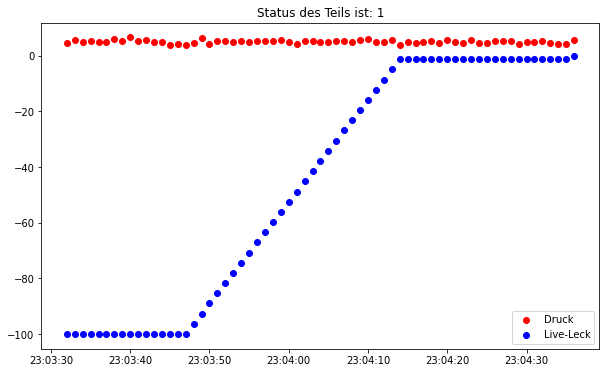

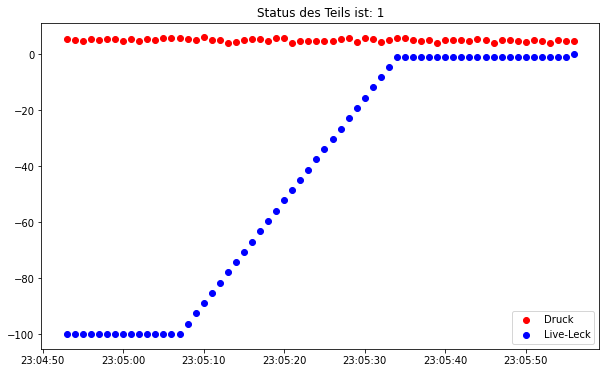

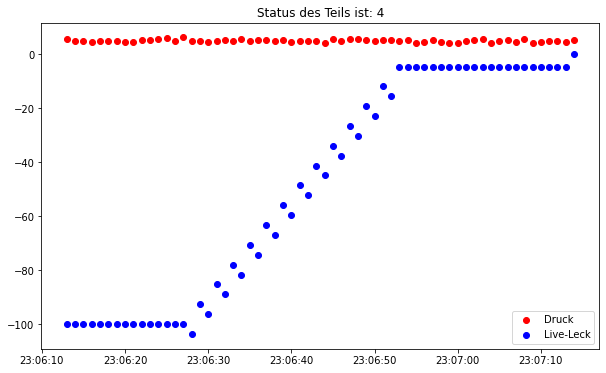

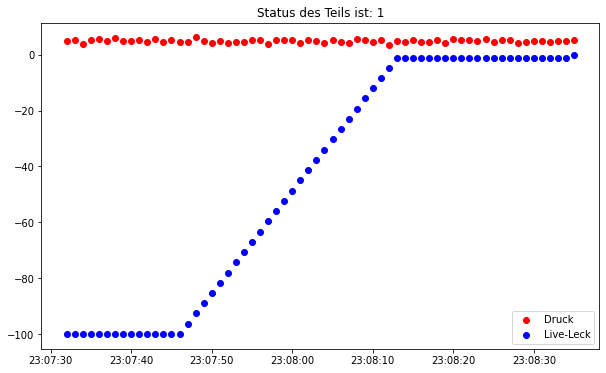

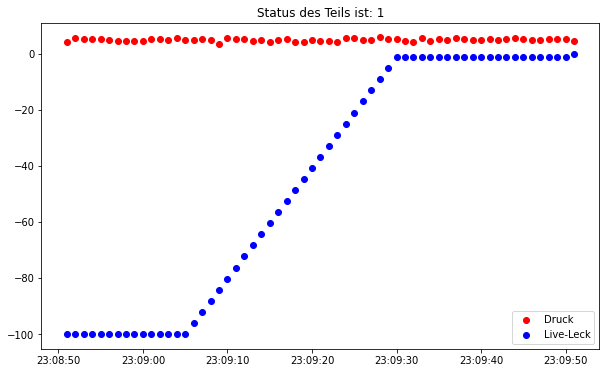

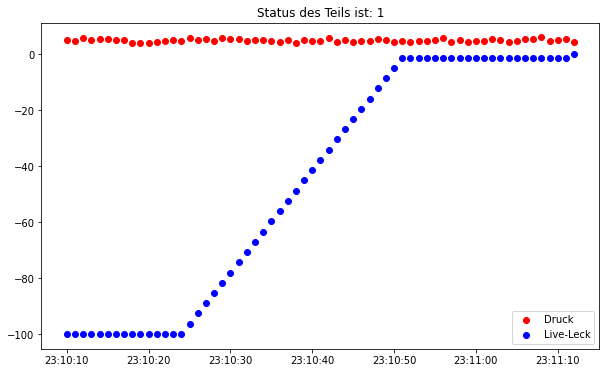

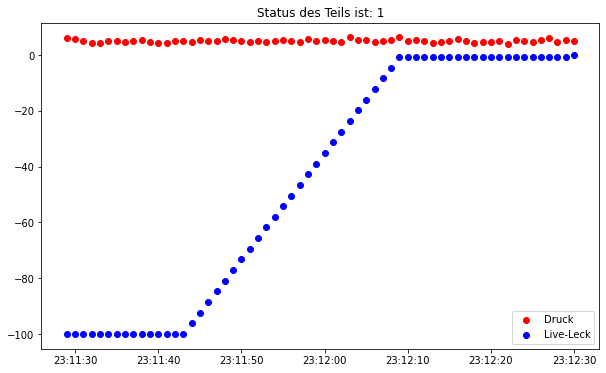

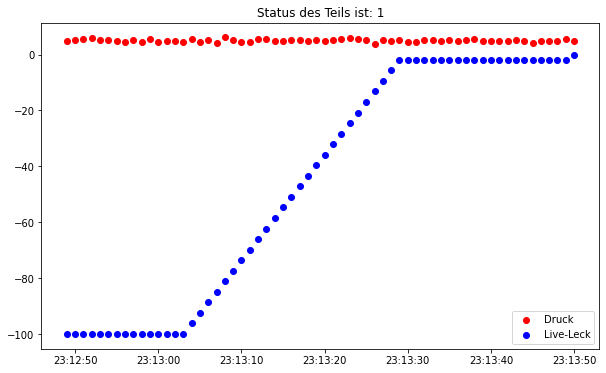

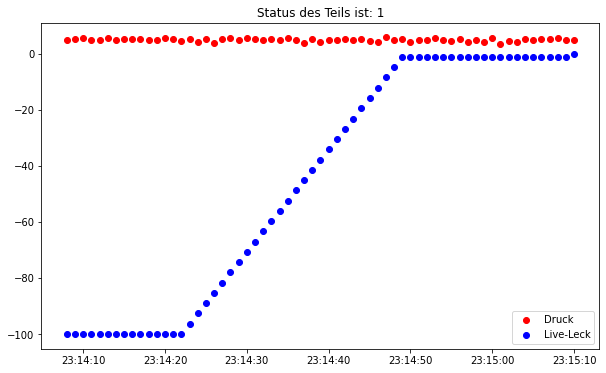

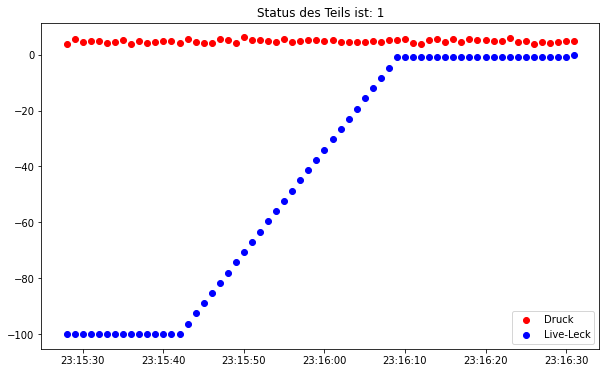

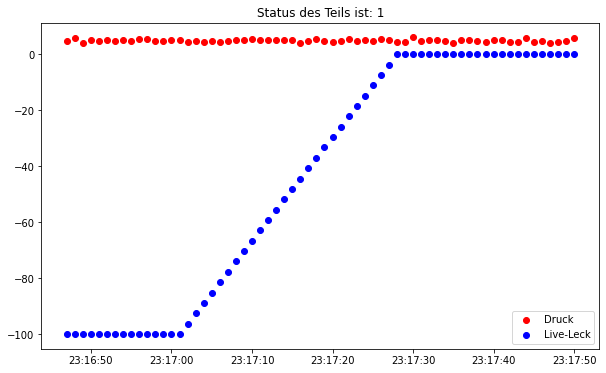

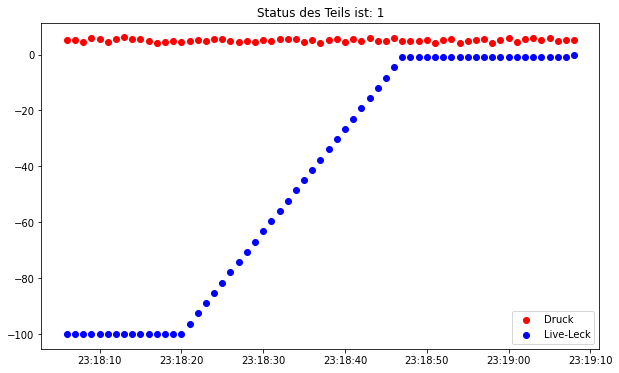

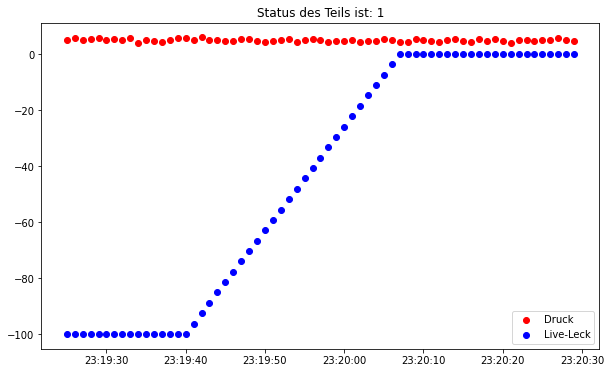

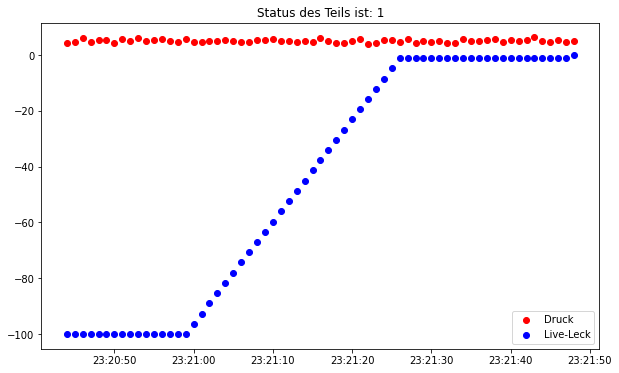

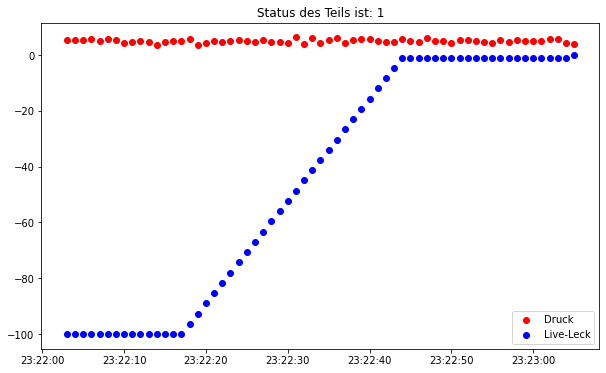

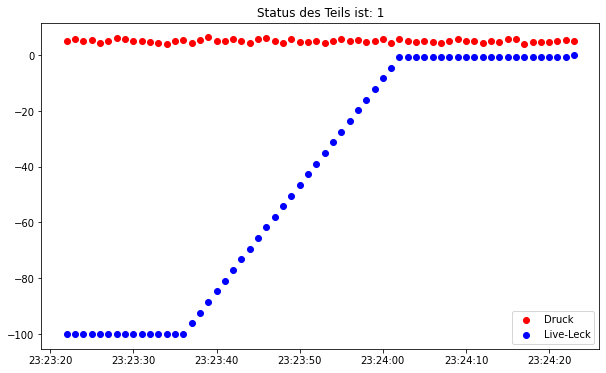

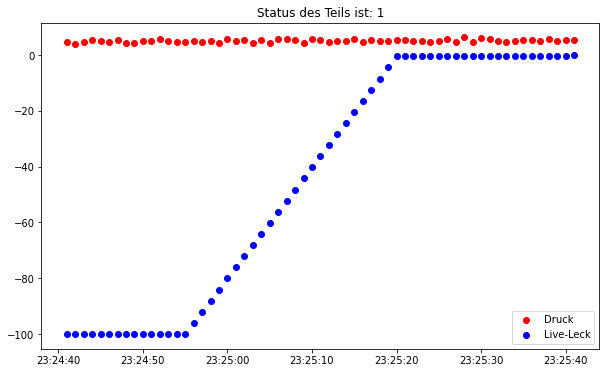

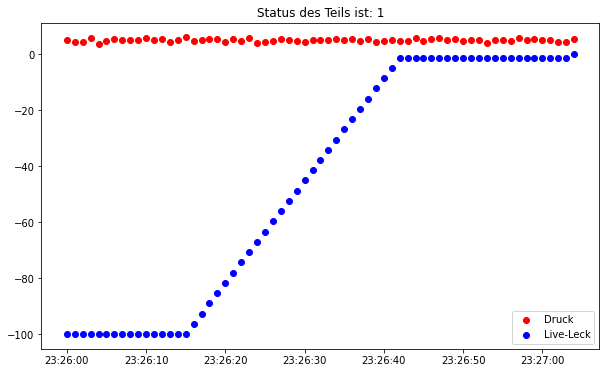

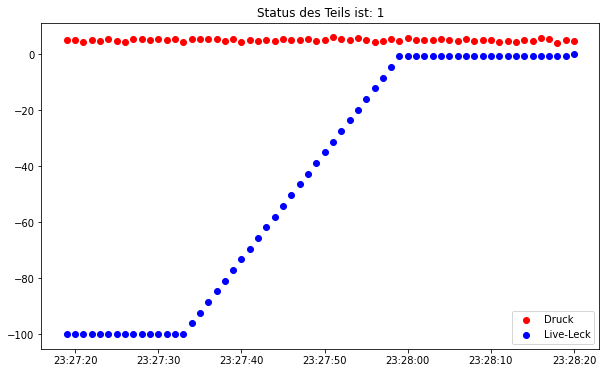

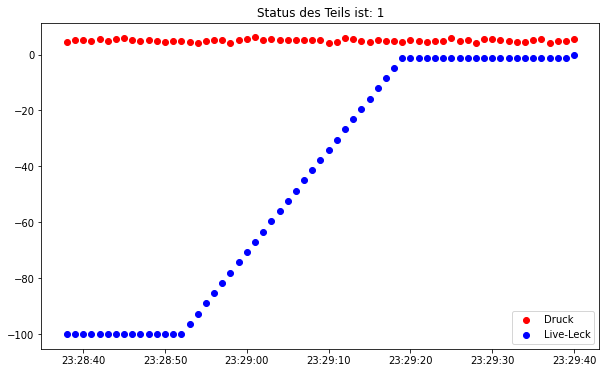

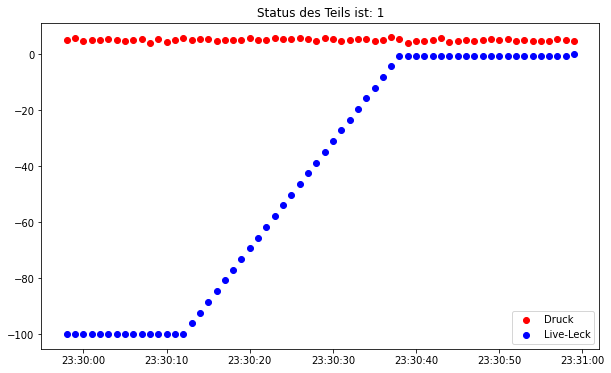

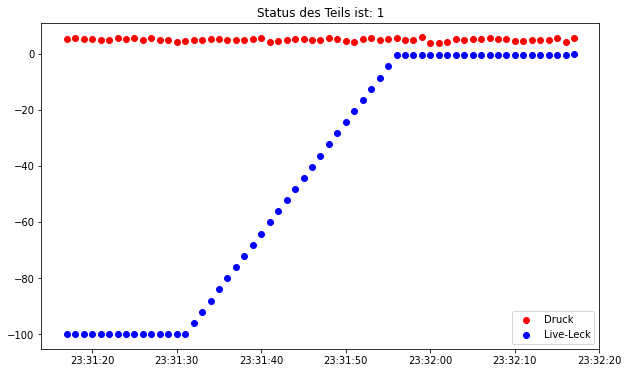

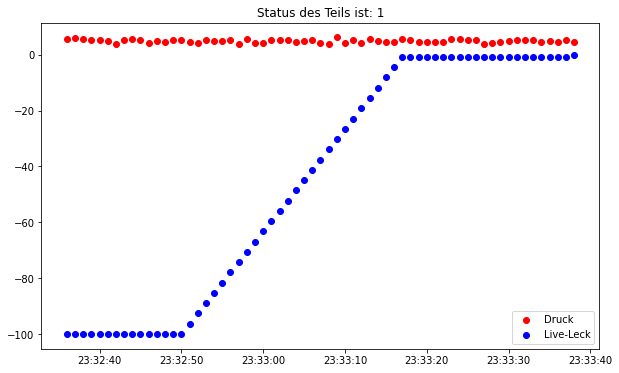

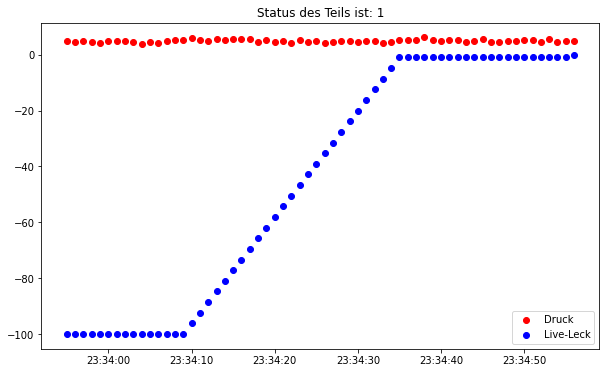

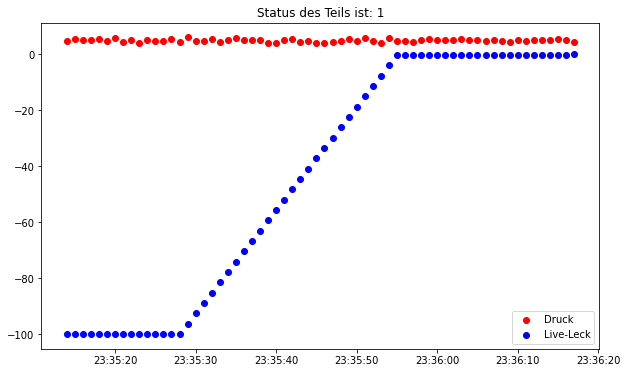

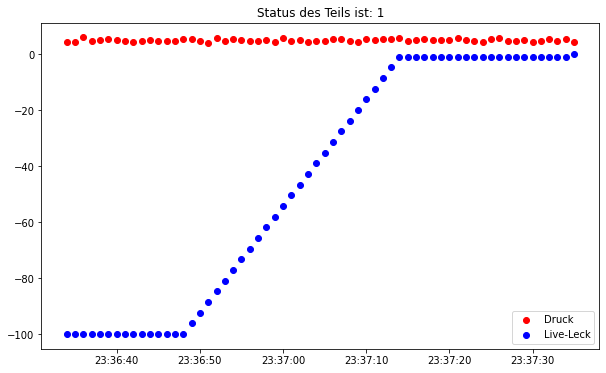

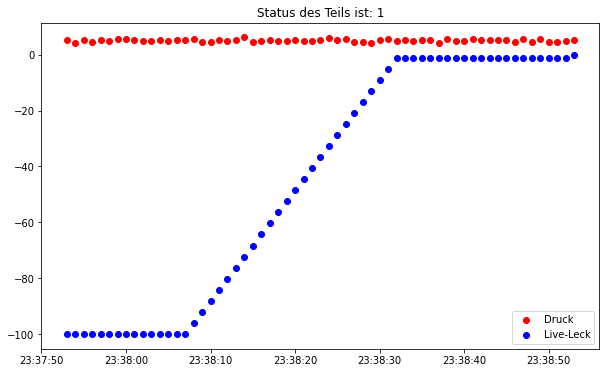

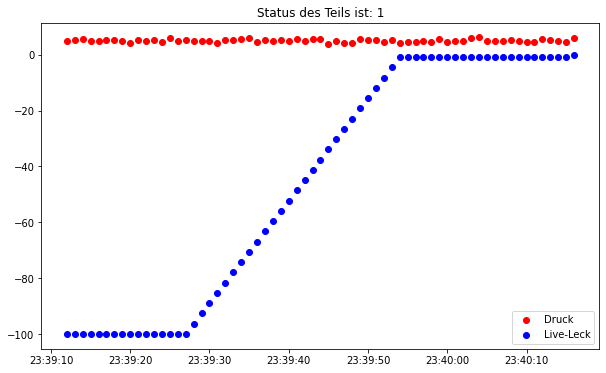

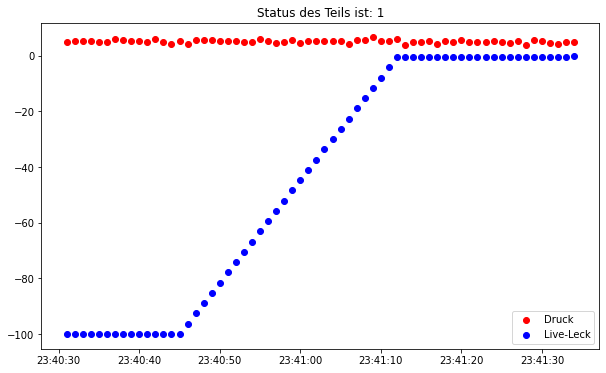

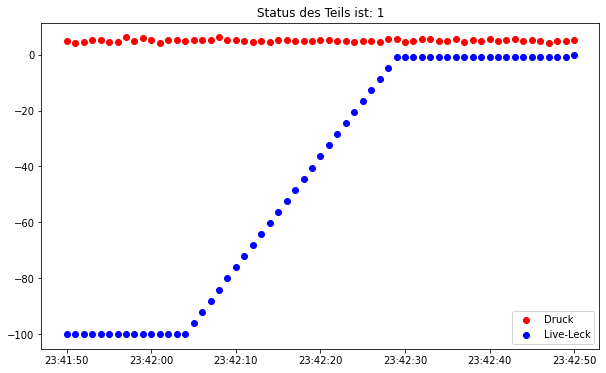

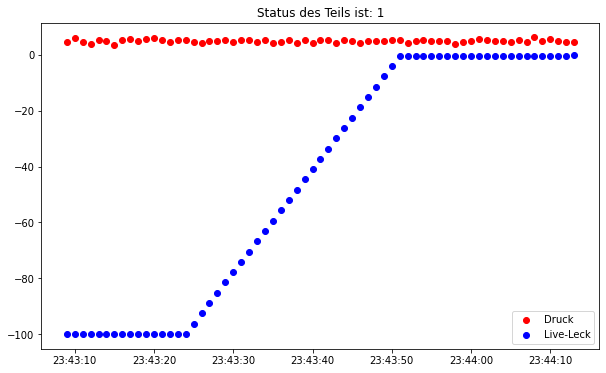

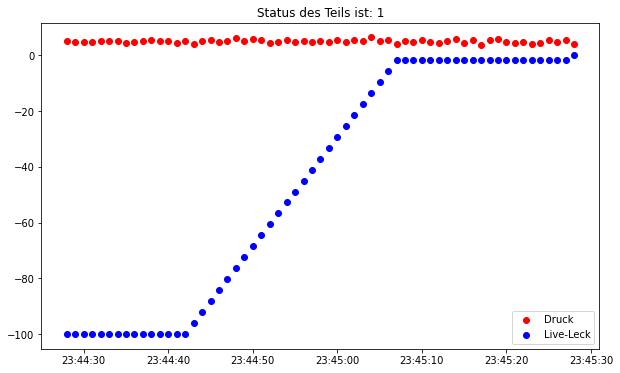

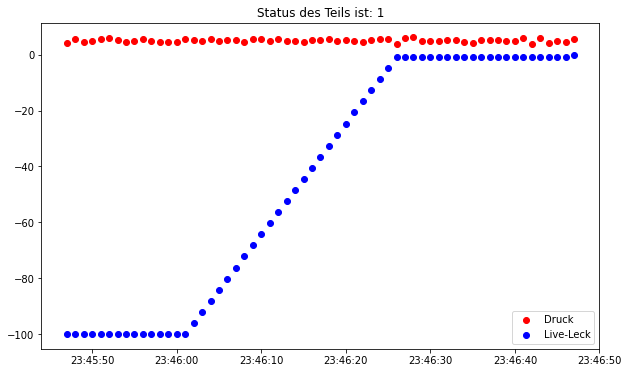

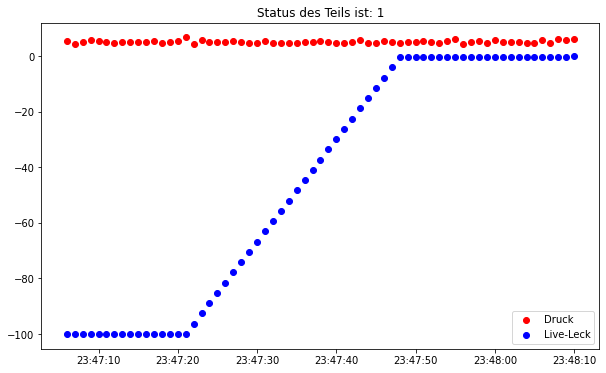

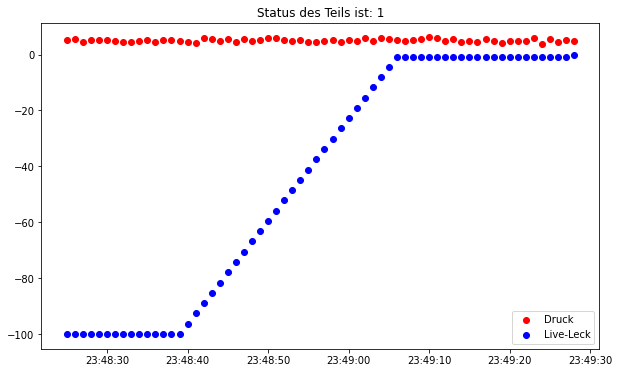

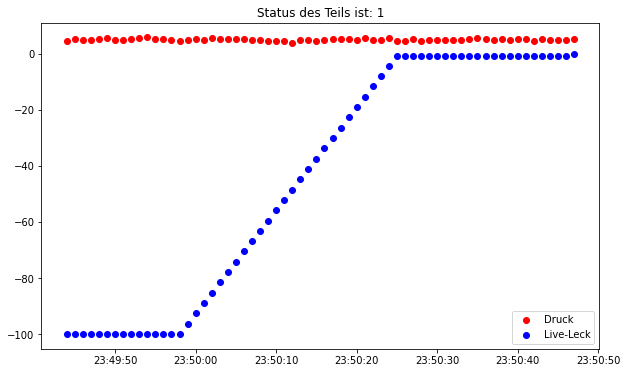

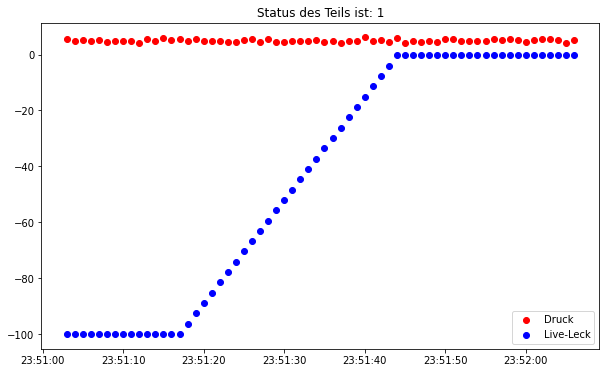

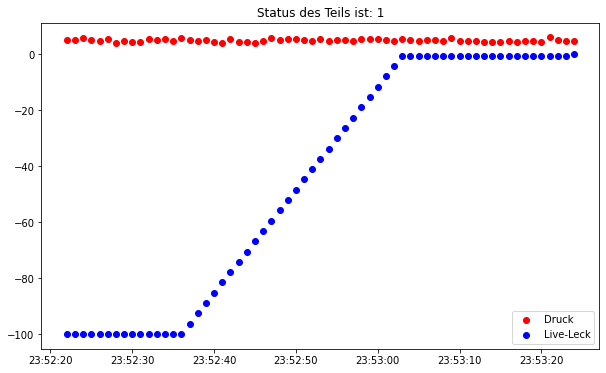

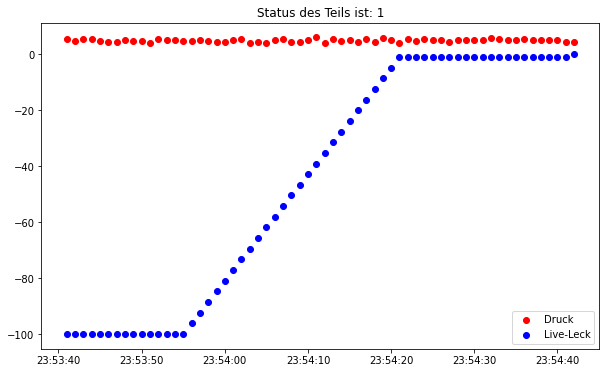

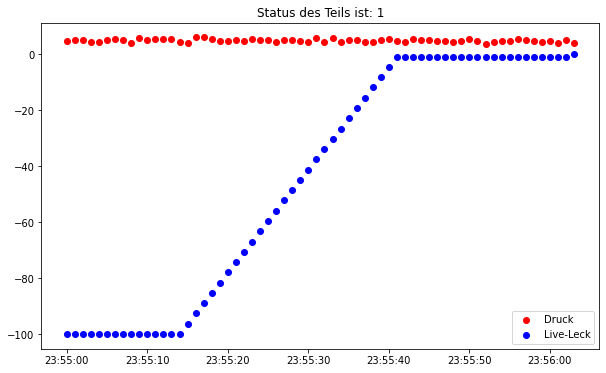

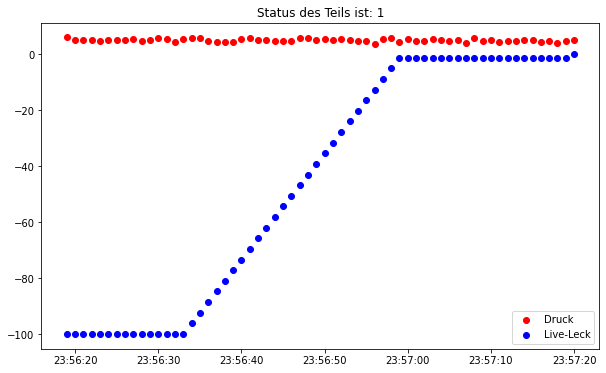

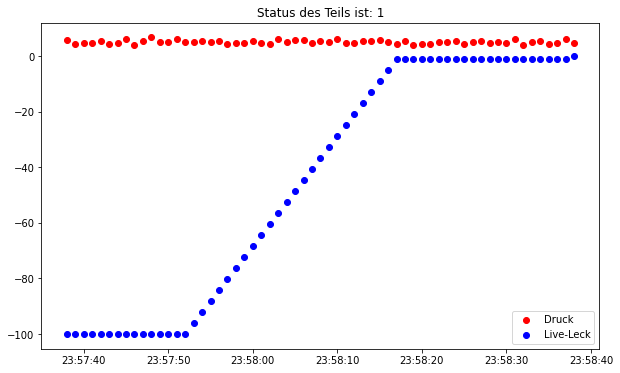

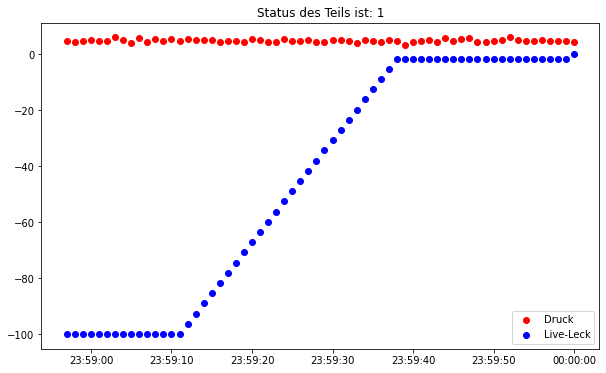

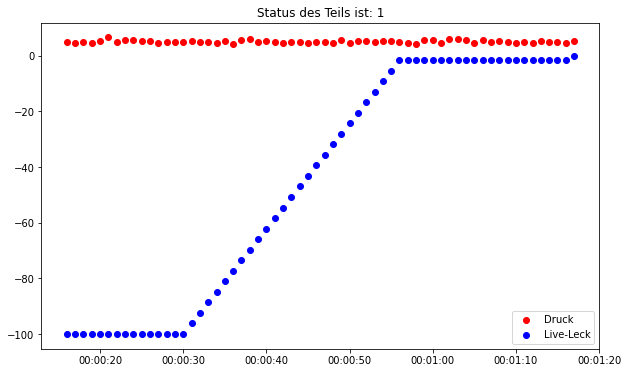

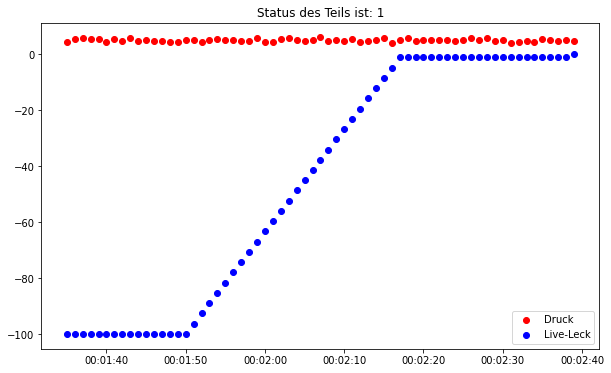

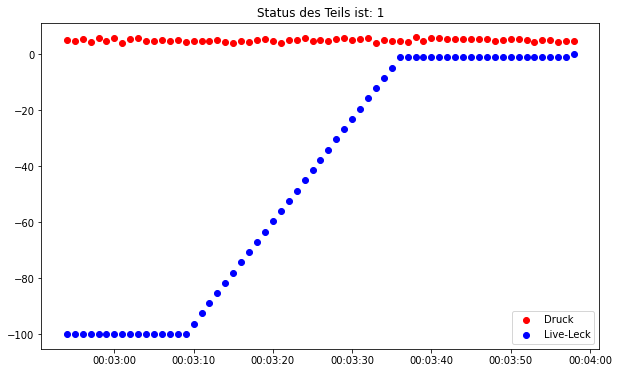

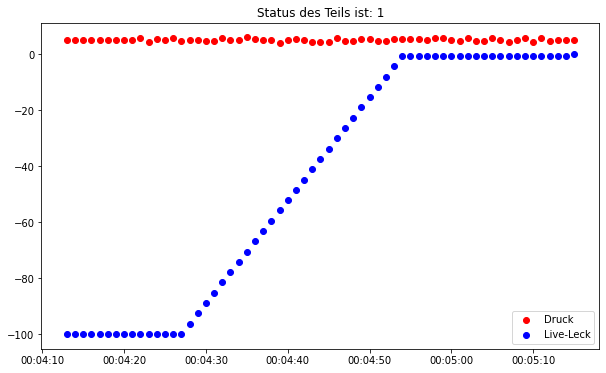

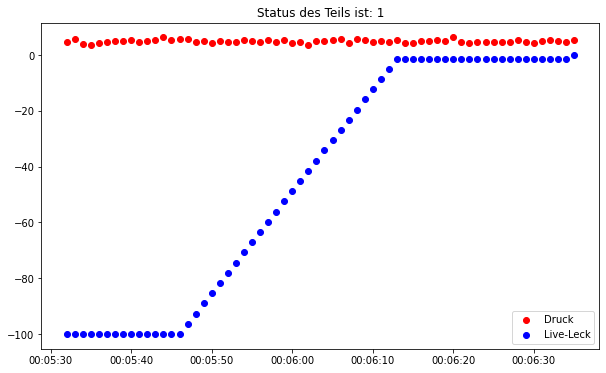

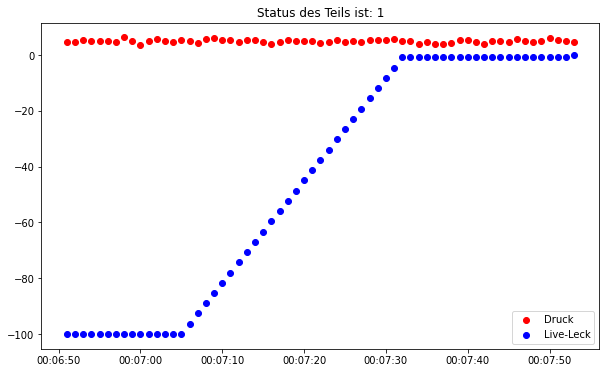

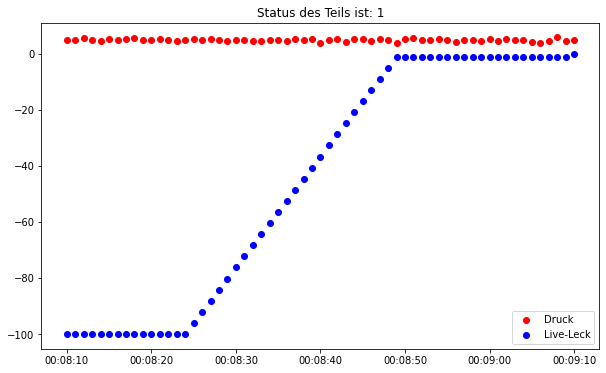

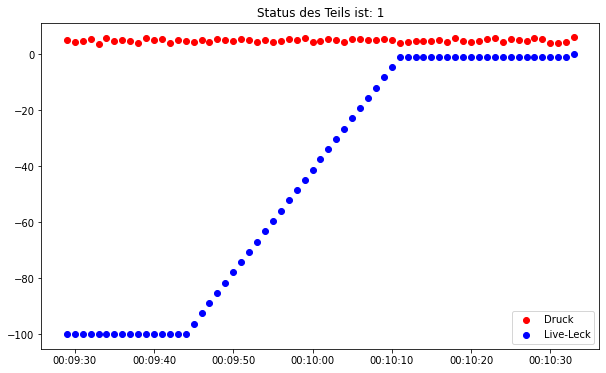

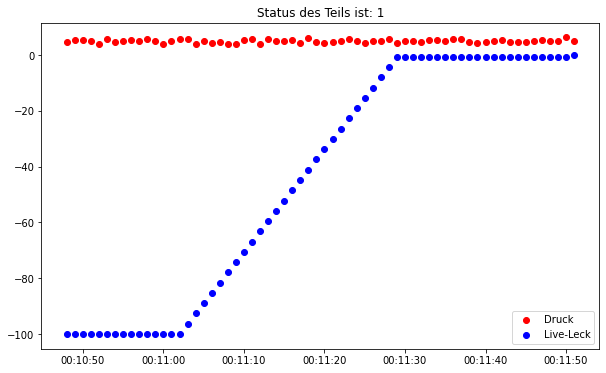

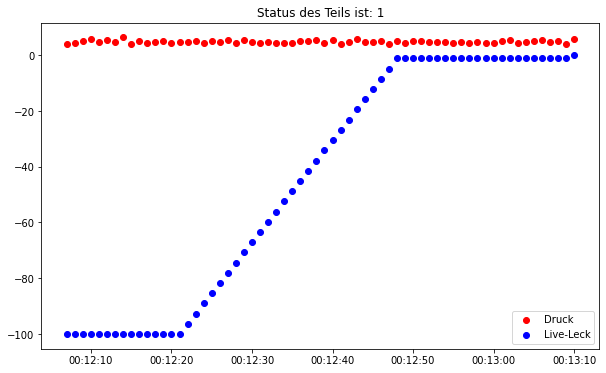

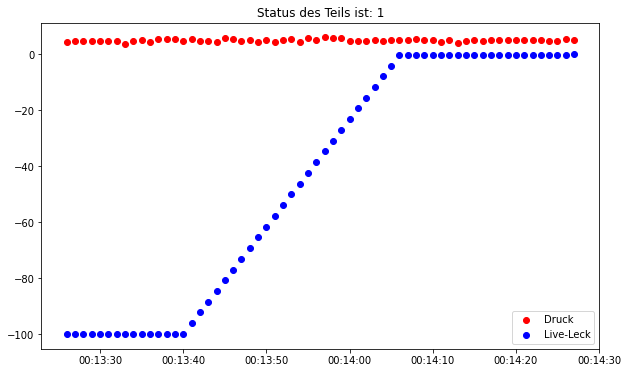

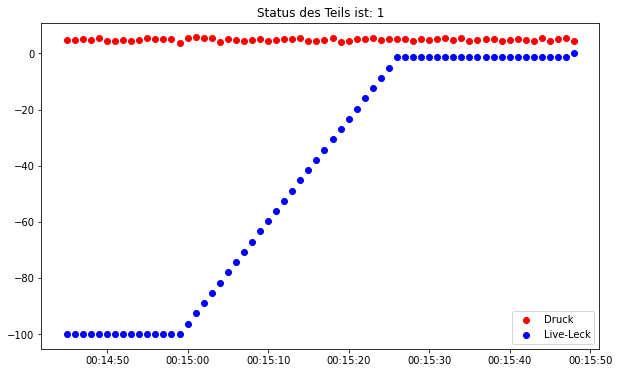

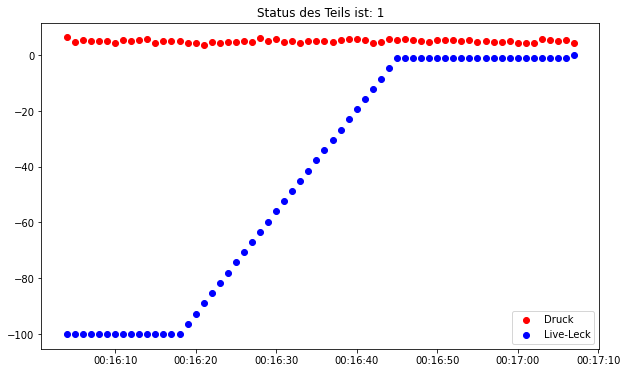

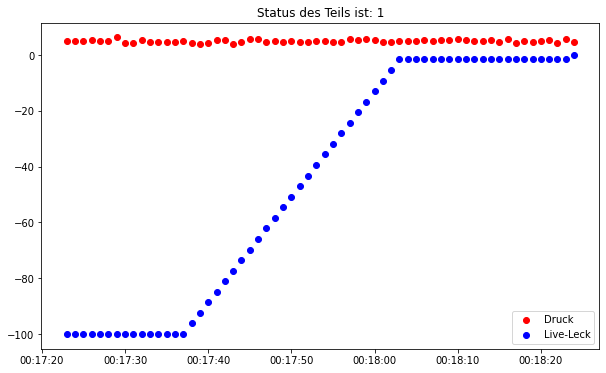

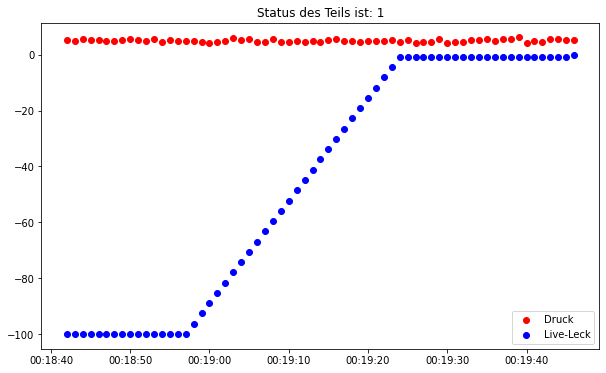

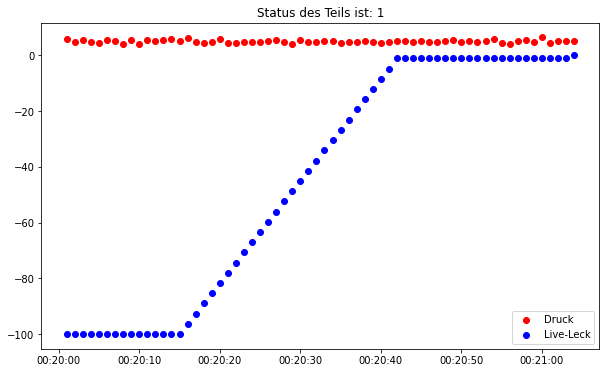

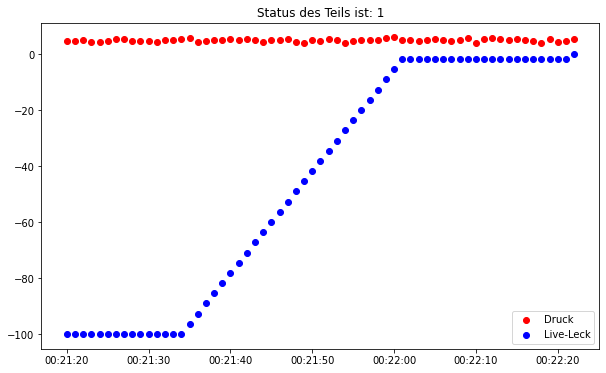

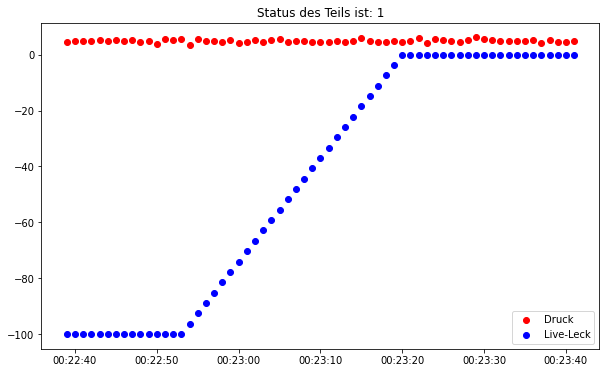

KeyboardInterrupt: 

In [63]:
for t in time_series:
    #if t.status[len(t)-1] == 4:
        fig, ax = plt.subplots(figsize=(10,6))
        ax.scatter(t.date, t.druck, color='red', label='Druck')
        ax.scatter(t.date, t.liveleck, color='blue', label='Live-Leck')
        ax.set_title(f"Status des Teils ist: {t.status[len(t)-1]}")
        plt.legend()
        plt.show()
        fig.clear()

In [71]:
live_leck = []
counter = 0
for i in status_4: 
    live_leck.append(i.liveleck)
    counter += 1

In [72]:
live_leck

[0    -100.000000
 1    -100.000000
 2    -100.000000
 3    -100.000000
 4    -100.000000
          ...    
 56     -4.550165
 57     -4.550165
 58     -4.550165
 59     -4.550165
 60     -4.550165
 Name: liveleck, Length: 61, dtype: float64,
 0    -100.000000
 1    -100.000000
 2    -100.000000
 3    -100.000000
 4    -100.000000
          ...    
 56     -6.192598
 57     -6.192598
 58     -6.192598
 59     -6.192598
 60     -6.192598
 Name: liveleck, Length: 61, dtype: float64,
 0    -100.000000
 1    -100.000000
 2    -100.000000
 3    -100.000000
 4    -100.000000
          ...    
 59     -5.525881
 60     -5.525881
 61     -5.525881
 62     -5.525881
 63     -5.525881
 Name: liveleck, Length: 64, dtype: float64,
 0    -100.000000
 1    -100.000000
 2    -100.000000
 3    -100.000000
 4    -100.000000
          ...    
 56     -5.879054
 57     -5.879054
 58     -5.879054
 59     -5.879054
 60     -5.879054
 Name: liveleck, Length: 61, dtype: float64,
 0    -100.000000
 1    -100

In [73]:
from tslearn.utils import to_time_series
formatted_time_series = to_time_series([live_leck])
print(formatted_time_series.shape)

c:\Users\pauls\AppData\Local\Programs\Python\Python38\lib\site-packages\tslearn\utils\utils.py:146: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ts_out = numpy.array(ts, copy=True)


ValueError: setting an array element with a sequence.

In [53]:
time_series.liveleck

AttributeError: 'list' object has no attribute 'liveleck'